## Assignment 1: Perceptron Training
Neural Networks and Computational Intelligence

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## a) Generate artificial data sets
P = 5      # number of feature vectors 
N = 3      # dim of feature vectors
def datasets(N,P):
    D = np.zeros((N+1, P))       # empty data set (each column is a vector, last el. is the label)
    for mu in range(P):
        D[:-1, mu] = np.random.normal(0, 1, size = N)
        D[-1, mu] = np.random.randint(2, size = 1)        # the labels are 0 and 1 not -+1
        if D[-1, mu] == 0:
            D[-1, mu] = -1
    return D
D = datasets(N,P)
print(D)

[[-0.91465091  0.25183373 -1.68764484  1.4045845   0.90709848]
 [-1.23860811  0.72388176 -1.93186741 -0.18059661 -0.17642868]
 [ 1.10012845  0.34781732  1.41007298  0.33891573 -1.42255552]
 [-1.          1.          1.          1.         -1.        ]]


In [52]:
## b) Sequential perceptron training

n_max = 2     # max number of epochs (loops through D)
n = 1           # epoch counter
t = 0
while n <= n_max:
    print('epoch', n)
    for mu in range(P):
        print('mu('+str(t)+') = ', mu, ':', D[:-1, mu])
        t += 1 
    n += 1


epoch 1
mu(0) =  0 : [ 0.03376868  0.58209255 -1.22349064]
mu(1) =  1 : [-1.70039199  0.11615836 -0.6139492 ]
mu(2) =  2 : [0.38218257 0.89966754 0.26087754]
mu(3) =  3 : [ 0.00986477 -1.68624585 -1.05538646]
mu(4) =  4 : [-0.09760361 -0.57090068  1.41009158]
epoch 2
mu(5) =  0 : [ 0.03376868  0.58209255 -1.22349064]
mu(6) =  1 : [-1.70039199  0.11615836 -0.6139492 ]
mu(7) =  2 : [0.38218257 0.89966754 0.26087754]
mu(8) =  3 : [ 0.00986477 -1.68624585 -1.05538646]
mu(9) =  4 : [-0.09760361 -0.57090068  1.41009158]


In [51]:
## c) Rosenblatt algorithm
def Ros_alg(N, P, D, n_max):
    w = np.zeros(N)      # weight vector
    E_mu = np.zeros(P)    # local potentials (one per input vector)
    n = 1
    #t = 0
    success = False
    while n <= n_max:
        #print('epoch', n)
        for mu in range(P):
            if E_mu[mu] <= 0:
                w += (D[:-1, mu]) * D[-1, mu] / N
            E_mu[mu] = np.dot(w, D[:-1, mu]) * D[-1, mu]
            #print(E_mu)
        #t += 1
        if not np.any(E_mu <= 0):
            success = True
            break
        n += 1
    return w, success

P = 5
N = 3
D = datasets(N,P)
w, s = Ros_alg(N, P, D, 10)


[1.   1.   0.98 0.83 0.39 0.25 0.08 0.03 0.   0.  ]


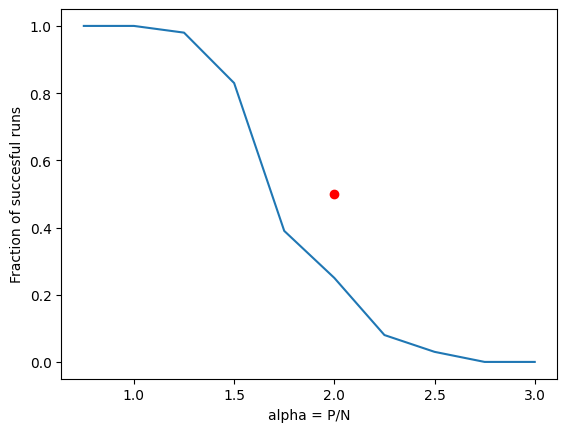

In [65]:
## d) Running the experiments

alpha = [0.25*i for i in range(3, 13)] #len 10
N = [20, 40]
n_D = 50    # number of random datasets for each P
n_max = 100     # max number of epochs 
succ_alpha = np.zeros(len(alpha))
for a in range(len(alpha)):
    successful_runs = 0
    for n_dim in N: 
        P = int(n_dim*alpha[a])
        for d in range(n_D):
            D = datasets(n_dim, P)
            ww, ss= Ros_alg(n_dim, P, D, n_max)    #I think I dont need w for anything
            successful_runs += ss
    succ_alpha[a] += successful_runs / n_D
succ_alpha = succ_alpha/(len(N))      
print(succ_alpha)

plt.plot(alpha, succ_alpha)
plt.xlabel('alpha = P/N')
plt.ylabel('Fraction of succesful runs')
plt.plot(2, 0.5, 'ro')
plt.show()
